- $z=\frac{X-\mu}{\sigma}$
    - Z-score 表示一个数据点偏离平均值多少个标准差
    - 如果 zscore = 0，表示该值等于平均值
    - 如果 zscore = 1，表示该值比平均值高一个标准差
    - 如果 zscore = -1，表示该值比平均值低一个标准差
- 偏度
    - skewness = 0: 数据分布对称(如正态分布)
    - skewness > 0: 正偏(右偏),分布有一条长尾在右边
    - skewness < 0: 负偏(左偏),分布有一条长尾在左边
- Kurtosis (峰度)
    - kurtosis = 3: 正态分布的峰度(注意代码中没有减3)
    - kurtosis > 3: 比正态分布更尖峭,极端值出现概率更高
    - kurtosis < 3: 比正态分布更平坦,极端值出现概率更低

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

# 生成示例数据
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

# 计算 z-score
z_scores = stats.zscore(data)

# 计算偏度
skewness = stats.skew(data)

# 计算峰度
kurtosis = stats.kurtosis(data, fisher=True) + 3  # scipy 默认 fisher=True，kurtosis=0 表示正态分布

print(f"偏度（Skewness）：{skewness}")
print(f"峰度（Kurtosis）：{kurtosis}")

偏度（Skewness）：0.03385895323565712
峰度（Kurtosis）：2.9532336755216706


                            skew   kurtosis
Standard Normal        -0.040620   3.085831
Positive Skew           0.837383   3.645651
Negative Skew          -0.841224   3.768312
High Kurtosis (t-dist) -2.427691  39.609910
Low Kurtosis (Uniform) -0.031505   1.862675


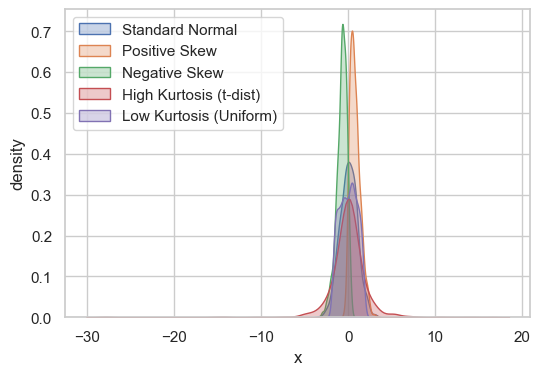

In [8]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set(style="whitegrid")

# 生成标准正态分布
standard_normal = np.random.normal(loc=0, scale=1, size=1000)

# 生成具有正偏度的分布（偏态正态分布）
skew_normal_pos = stats.skewnorm.rvs(a=5, loc=0, scale=1, size=1000)  # a>0 表示正偏

# 生成具有负偏度的分布（偏态正态分布）
skew_normal_neg = stats.skewnorm.rvs(a=-5, loc=0, scale=1, size=1000)  # a<0 表示负偏

# 生成具有高峰度的分布（t分布）
t_dist = stats.t.rvs(df=2, loc=0, scale=1, size=1000)  # df较小，峰度高

# 生成具有低峰度的分布（均匀分布）
uniform_dist = np.random.uniform(low=-np.sqrt(3), high=np.sqrt(3), size=1000)  # 均匀分布的峰度约为1.8

# 创建一个数据框用于绘图
df = pd.DataFrame({
    'Standard Normal': standard_normal,
    'Positive Skew': skew_normal_pos,
    'Negative Skew': skew_normal_neg,
    'High Kurtosis (t-dist)': t_dist,
    'Low Kurtosis (Uniform)': uniform_dist
})

# 计算每个分布的偏度和峰度
stats_summary = df.agg(['skew', 'kurtosis']).T
stats_summary['kurtosis'] += 3  # 将 scipy 的 Fisher kurtosis 转换为常规峰度

print(stats_summary)

# 绘制密度图
plt.figure(figsize=(6, 4))
for column in df.columns:
    sns.kdeplot(df[column], label=column, fill=True, alpha=0.3)

plt.title('')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.show()